<a href="https://colab.research.google.com/github/hayman42/ml_study/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression (로지스틱 회귀)

## 1. Logistic Regression 알아보기

-> 로지스틱 회귀란 : 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘임.

-> ex. 스팸 이메일 필터링 
(이메일을 받았을 때, 그것이 스팸일 확률이 0.5이상이면 spam으로 분류하고, 확률이 0.5보다 작으면 ham으로 분류함.)

-> ex. 유방암 데이터셋을 classification화(분류화)

-> 2개의 선택지 중에서 하나를 고르게 분류하는 것을 이진 분류(binary classification)라고 함. 이렇게 로지스틱 회귀는 이진 분류 문제를 해결할 수 있는 도구 중 하나로 Linear Model에 해당함.


-> 그렇다면 굳이 Linear Model에 해당하는 Linear Regression을 사용하지 않고 왜 새로운 도구인 Logistic Regression을 사용하는지 궁금했음. 

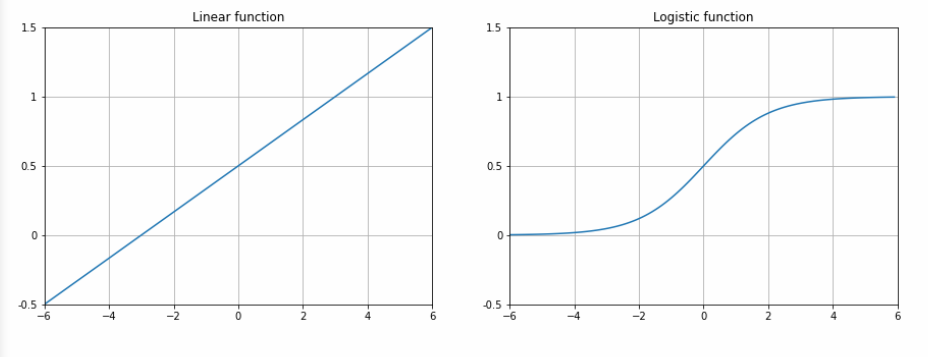

-> 왼쪽은 일반적인 Linear Regression의 결과 얻을 수 있는 선형 함수임. 이렇게 Linear Function (= Sigmoid function)을 살펴보면 y값의 범위가 0과 1사이로 한정되어 있지 않은 것을 볼 수 있음. (확률이 음과 양의 방향 무한대로 뻗어 있음.) 이 이유로 Logistic Regression을 사용하는 것임. 예를 들어 여러 데이터들을 사용하여 합격/불합격을 판단할 수 있는 모델을 Linear Regression을 이용하여 만든다고 생각을 했을 때, 우리가 원하는 답으로는 합격일 때 =1, 불합격일 때 =0이 나왔으면 함. 하지만 만약에 결과값이 1.2가 나왔을 때 혹은 -0.5가 나왔을 때, 합격인건지 불합격인건지 확실히 말을 할 수 없음. 따라서 만들어진 게 바로 Logistic Regression임. 

-> 오른쪽 그림은 Logistic Regression의 결과로 얻게 된 함수인 Logistic function임. Logistic function은 해당 데이터가 특정 클래스에 속할 확률 값을 출력하는 함수임. 따라서 그림에 보이듯이, y값의 범위가 0에서 1로 한정되어 있음. 이렇기 때문에 0.5와 같은 특정 값을 기준으로 그 값보다 크면 1, 작으면 0으로 분류하여 이진 분류를 쉽게 수행할 수 있음. 


-> 그래프를 보면서 느낀 이상한 점은 Logistic function의 모양이 선형이 아닌데 Linear Model에 속한다는 것이였음. 
= 이것은 수학적 식을 살펴보면서 이유를 알게 되었음. 

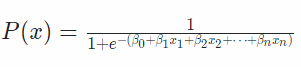

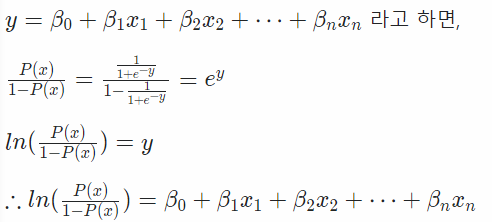

-> 위의 수식에서 알 수 있듯이, Logistic Regression의 결과 얻을 수 있는 함수도 선형 모양임을 알 수 있음. 즉, Logistic Regression도 다른 Linear model처럼 선형 식의 회귀 계수를 찾는 과정인 것임. (머신러닝 모델이 선형인지 아닌지를 판단하는 것은 모델을 통해 얻을 수 있는 식 자체의 모양에 의한 것이 아니라 회귀 계수에 대한 식이 선형인지 아닌지에 의해 결정됨.)

### Logistic Regression에서 데이터가 특정 범주에 속할 확률을 예측하기 위해 이러한 단계들을 거침. 

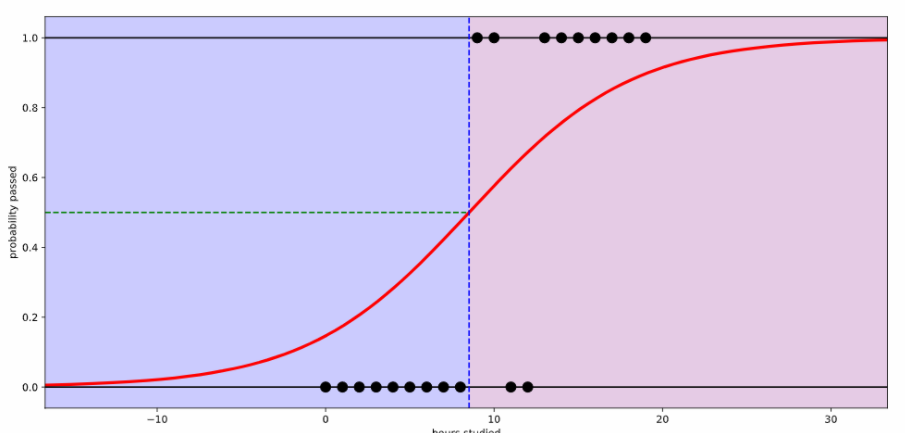

1. 모든 속성(feature)들의 계수(coefficient)와 절편(intercept)을 0으로 초기화함.
2. 각 속성들의 값(value)에 계수(coefficient)를 곱해서 log-odds를 구함.
3. log-odds를 sigmoid 함수에 넣어서 [0,1] 범위의 확률을 구함.

#### Log-Odds

1) 개념
Logistic Regression을 구하기 위해서 각 속성들의 값(value)에 계수(coefficient)를 곱해서 log-odds를 구함. (이 점이 선형 회귀와 다름..)

- odds : 사건이 발생할 확률을 발생하지 않을 확률로 나눈 값
ex) 만약에 학생이 0.7 확률로 시험에 합격한다면, 당연히 시험에서 떨어질 확률은 0.3이 되니까 odds = 0.7/0.3임.

- log-odds : odds에 log를 취한 것임. 

2) 계산
로지스틱 회귀에서는 아래와 같이 여러 속성(feature)들에 계수(coefficient)를 곱하고 절편(intercept)을 더해서 최종 값 log-odds를 구해야 하기 때문에 좀 까다로움. 
- dot product 방식으로 구함. (일단 각 속성(feature)들의 값이 포함된 행렬, 그 속성들 각각의 계수(coefficient)가 포함된 행렬을 아래와 같이 계산할 수 있음. 
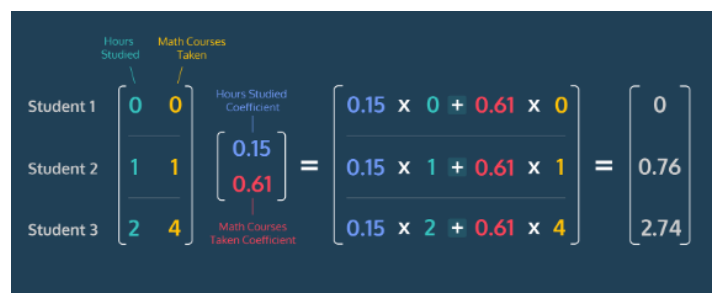

In [ ]:
# 연산은 파이썬 numpy의 np.dot()으로 쉽게 처리할 수 있음.
log_odds = np.dot(features, coefficients) + intercept

#### Sigmoid Function
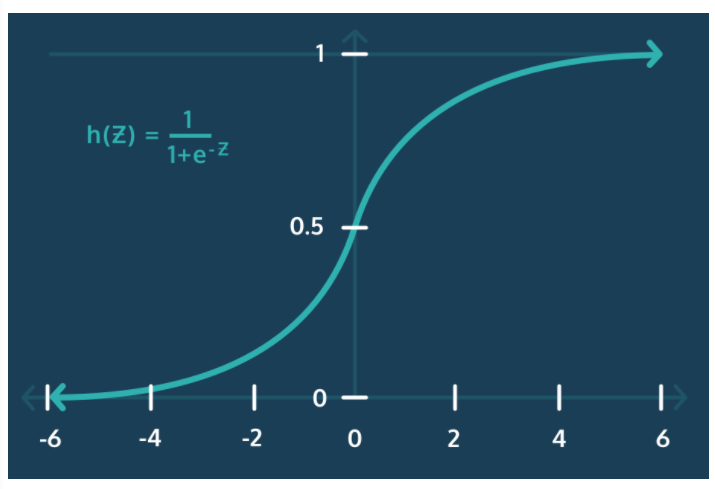

-> 아까 구한 log-odds를 Sigmoid 함수에 넣어서 0부터 1사이의 값으로 변환해줌.

-> 여기서 e^(-z)는 지수 함수이고, numpy에서 np.exp(-z)로 쉽게 계산할 수 있음.

#### Log Loss (로그 손실)

- 로지스틱 회귀가 확률을 제대로 예측해주는지, 즉 구해놓은 속성들의 계수(coefficients)와 절편(intercept)이 적절한지 확인하기 위해 손실(Loss)을 고려해야 함. 

- 모델의 “적합성”을 평가하기 위해 각 데이터 샘플의 손실(모델 예측이 얼마나 잘못되었는지)을 계산한 다음 그것들의 평균화 해야 함.

- 로지스틱 회귀에 대한 손실 함수는 Log Loss(로그 손실)라고 부름.
=> 로지스틱 함수를 구성하는 계수와 절편에 대해 Log Loss(로그 손실)을 최소화하는 값을 찾는 것임.

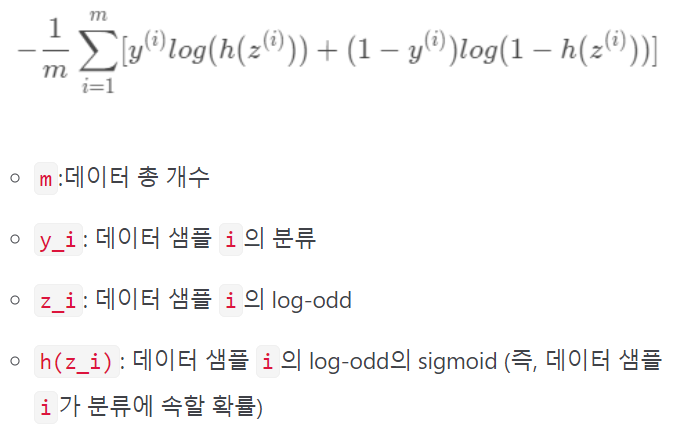



-> 그런데 이 로그 손실을 두 개로 나눠서 이해할 필요가 있다. 왜냐면 로지스틱 회귀는 특정 범주로 분류될 것인가, 그렇지 않을 것인가, 즉 2진 분류를 하기 때문에.

--> y = 1 (어떤 데이터 샘플의 클래스 y가 1인 경우, 즉 학생이 시험에 합격한 경우)
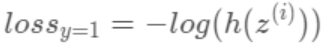
(이 데이터의 손실은 학생이 시험에 통과할 확률에 로그를 씌운 것임.)


--> y = 0 (어떤 데이터 샘플의 클래스 y가 0인 경우, 즉 학생이 시험에 탈락한 경우)
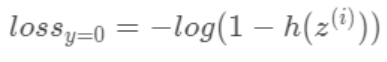

(이 데이터의 손실도 그냥 학생이 시험에 탈락할 확률을 1에서 빼고 로그를 씌운 것임.)
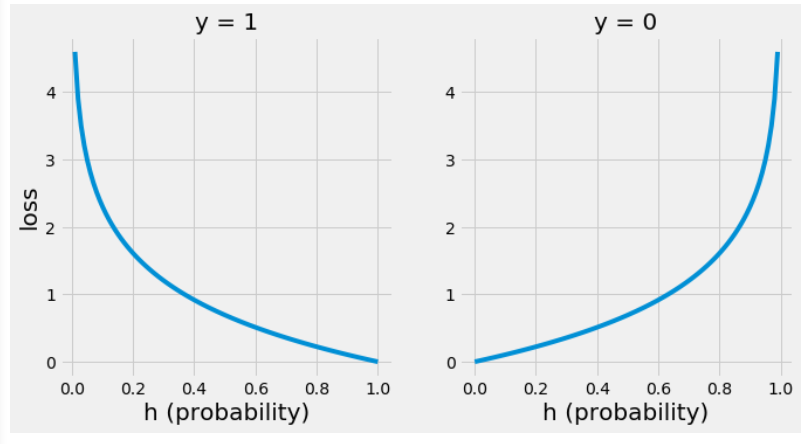

-> 정확한 예측은 손실이 거의 없는 반면 잘못된 예측은 거의 무한대에 가까운 큰 손실을 초래하는 꼴

-> 이렇게 예측이 잘못되면서 손실이 점진적으로 증가하는 꼴을 줄이고, 올바른 예측을 하면서 손실이 작아지는 모델에 가까워지도록 하는 게 우리의 목표.

-> 선형 회귀와 마찬가지로 경사하강법(Gradient Descent)을 사용하여 모든 데이터에서 로그 손실(Log Loss)을 최소화하는 계수를 찾을 수 있음. 

#### Classification Threshold (임계값)
- 로지스틱 회귀 알고리즘의 결과 값은 ‘분류 확률’이고, 그래서 이 확률이 특정 수준 이상 확보되면 샘플이 그 클래스에 속할지 말지 결정

- 당연히 대부분의 알고리즘에서 기본 임계 값은 0.5

- 다만, 필요에 따라 모델의 임계값을 변경할 수 있음. 예를 들어, 암을 진단하는 로지스틱 회귀 모델을 작성하는 경우에는 혹시 모를 경우에 대비하여 좀 더 민감하게 확인하기 위해 0.3이나 0.4로 임계값을 낮춰 모델의 민감도를 높일 필요가 있음. 그래야 전체적으로 오분류가 더 많아지더라도 실제 암 환자를 놓치는 사례는 적어질 것이기 때문에.

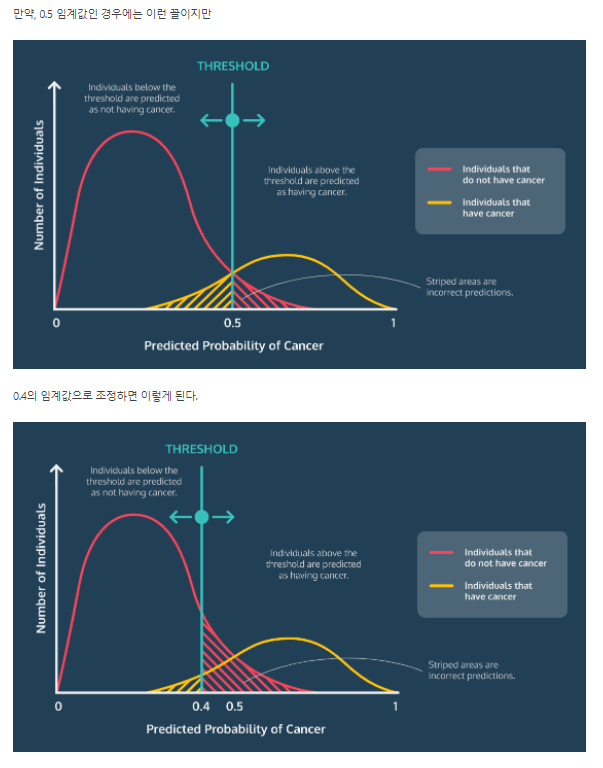

## 2. Logistic Regression 실습

Scitkit-learn을 통해 사용할 수 있는 데이터셋 중 하나인 breast cancer 데이터셋을 사용함. 이 데이터셋은 환자들의 종양에 대해서 아래와 같은 정보를 담고 있음. 
- radius
- texture
- perimeter
- area
- smoothness
- compactness
- concavity
- concave_points
- symmetry
- fractal_dimension

원본 데이터는 위 항목 각각에 대한 평균(mean), 표준오차(error), 큰 값 3개의 평균(worst)을 담고 있지만, 오늘은 이들 중 평균(mean)만 사용해볼 것임. 우리는 위의 정보를 활용해서 각각의 종양이 양성인지, 악성인지 예측하는 모델을 만들 것임. 종양의 양성/악성 여부는 label 컬럼에서 확인할 수 있음. 1은 양성(benign), 0은 악성(malignant)을 나타냄.

[잠깐!]
이 글의 목적은 Logistic Regression에 대한 이해이므로 데이터의 전처리와 EDA에 대한 서술을 생략했다. 그러나 사람도 좋은 교재로 공부해야 좋은 성적이 나올 수 있듯이, 모든 예측 모델은 좋은 데이터를 사용해서 만들어야 좋은 성능을 기대할 수 있다. 따라서 전처리와 EDA를 통해 데이터를 정제하고, 파악하는 과정을 반드시 수행해야 한다.

In [ ]:
# 라이브러리 및 패키지 import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# 데이터 불러오기
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df = df.iloc[:, :10] # 열한번째 열 선택
df["label"] = breast_cancer.target
df.columns = [ col.replace(" ", "_") for col in df.columns]

# 확인
df.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


In [ ]:
# Step 1) 데이터셋 나누기 

# 주어진 데이터셋을 train, validation, test 데이터셋으로 나누기
# train : 말 그대로 모델의 학습에 사용하는 데이터셋
# validation : 모델을 만드는 과정에서 모델의 feature수, degree와 같은 hyperparameter를 결정하는 데 사용. 즉, 학습에 직접적으로 사용하는 것은 아니지만, 모델의 개선에 관여를 하긴 함.
# test : 모델의 최종 성능을 검증할 때 사용. 즉, 모델의 개선에 전혀 관여하지 않음. 

from sklearn.model_selection import train_test_split #학습 데이터와 테스트 데이터를 분리 해주는 함수

# train/test으로 나누기
train, test = train_test_split(df, test_size = 0.15, random_state = 1)

# train을 다시 train/validation으로 나누기
train, val = train_test_split(train, test_size = 0.18, random_state = 1)

# 확인
train.shape, val.shape, test.shape


((396, 11), (87, 11), (86, 11))

In [13]:
# Step 2) 기준모델 만들기 
# 기준모델은 앞으로 만들 예측 모델이 학습이 잘 된 모델인지, 의미있는 모델인지 판단하는 기준이 되어줌. 
# 새로 만든 모델이 기준모델보다 정확도가 높다면 학습이 잘 된 모델이고, 그렇지 않다면 학습이 잘 되지 않은 모델임. 
# 분류모델에서 사용할 수 있는 가장 기초적인 기준모델은 label을 무조건 train 데이터셋의 최빈 클래스로 예측하는 것임.

from sklearn.metrics import accuracy_score

# 모델 만들기
majority_class = train["label"].mode()[0]

# 기준모델의 정확도 계산을 위한 데이터 생성 
y_pred = [majority_class] * len(val) 

# validation 데이터셋에 대한 정확도 확인
print("최빈 클래스: ", majority_class)
print("validation 데이터셋 정확도: ", accuracy_score(val["label"], y_pred))

최빈 클래스:  1
validation 데이터셋 정확도:  0.5287356321839081


train 데이터셋의 최빈 클래스는 1임. 따라서 모든 종양의 클래스를 1, 즉 양성이라고 예측하는 게 우리의 기준모델. 그리고 기준모델의 정확도는 약 0.53. 즉, 새로운 종양에 대해서 종양의 크기, 위치, 질감 등 어떠한 특징도 고려하지 않고 무조건 양성이라고 예측해도 약 53%는 맞힌다는 것임. 따라서 앞으로 우리가 만들 예측모델은 정확도가 약 0.53보다는 높아야 학습이 잘 되었고 의미가 있는 모델이라고 말 할 수 있음.

In [14]:
# Step 3) feature Matrix와 target vector 만들기
# feature Matrix를 만들기 위해서는 어떤 feature를 사용할 것인지 선택을 해야함. 
# 여기에서는 우선 가지고 있는 feature들을 최대한 다 사용해보도록 할 것임. 
# 그렇지만 고려해야될 사항은 다중공선성인데 다중공선성이란 feature들 사이에 강한 상관관계가 존재하는 것임.
# 만야게 데이터셋에 다중공선성이 있다면 제대로 된 모델을 만들 수 없음. 따라서 주의해야됨. 

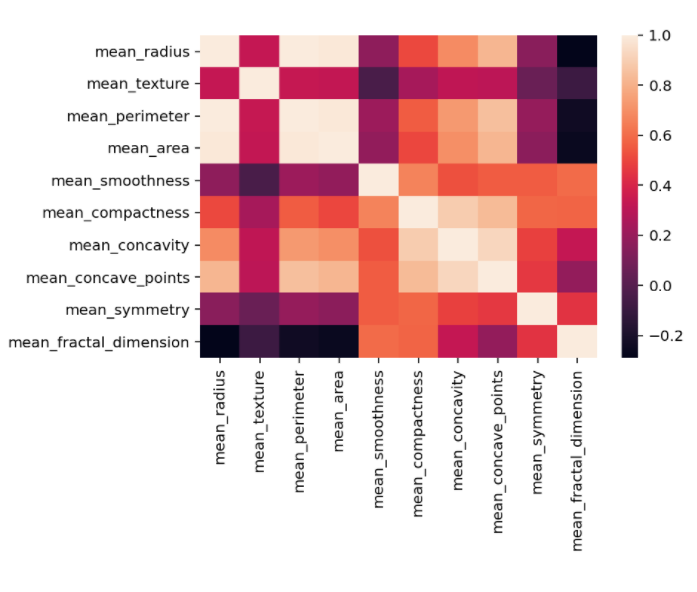

-> 이 그림은 breast cancer 데이터셋서 사용할 feature들의 상관 계수를 히트맵으로 정리한 것임. 보이듯이 mean_radius, mean_perimeter, mean_area 사이에 강한 상관관계가 있으며, mean_compactness, mean_concave_points, mean_concavity 사이에도 강한 상관관계가 있음을 확인할 수 있음. 따라서 이 feature들의 경우에는 각각의 집합에서 한 개씩만 선택하여 사용해야 함.

-> 우선 강한 상관관계가 없는 mean_texture, mean_smoothness, mean_symmetry, mean_fractal_dimension과 mean_area, mean_concave_points를 선택해서 모델을 만들어보자. 그리고 target은 종양의 양성/음성 여부인 label임.

In [8]:
# feature/target 설정
feature = ["mean_texture", "mean_smoothness", "mean_symmetry", "mean_fractal_dimension", "mean_area", "mean_concave_points"]
target = "label"

# train 데이터셋
X_train = train[feature]
y_train = train[target]

# validation 데이터셋
X_val = val[feature]
y_val = val[target]

# test 데이터셋
X_test = test[feature]
y_test = test[target]

# 확인
print("feature Matrix: ", X_train.shape, X_val.shape, X_test.shape)
print("target vector: ", y_train.shape, y_val.shape, y_test.shape)

feature Matrix:  (396, 6) (87, 6) (86, 6)
target vector:  (396,) (87,) (86,)


스케일 조정

다음으로 할 일은 feature들의 스케일을 통일해주는 것임. feature들의 스케일이 다르다면 각 feature가 label의 결정에 미치는 영향을 제대로 비교할 수 없음. 

-> StandardScaler(스케일 맞추기 위한 방법)는 각 feature의 평균을 0, 표준편차를 1로 맞춰준다.

In [9]:
from sklearn.preprocessing import StandardScaler

# 스케일러 생성
scaler = StandardScaler()

# 스케일 조정
X_train_sclaed = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 일부만 확인
X_train_sclaed.T[0].mean(), X_train_sclaed.std()

(1.4802973661668753e-16, 1.0)

In [10]:
# Step 4) Logistic Regression 모델 만들기

from sklearn.linear_model import LogisticRegression

# 모델 생성 및 학습 시키기
logistic = LogisticRegression()
logistic.fit(X_train_sclaed, y_train)

# 결과 확인
print("validation 데이터셋 정확도")
logistic.score(X_val_scaled, y_val)

validation 데이터셋 정확도


0.9425287356321839

정확도가 약 0.94로 굉장히 높게 나옴을 확인할 수 있음. 특히 기준 모델의 정확도인 0.53과 비교해보면 위 모델은 학습이 잘 된 모델이라고 할 수 있음:)

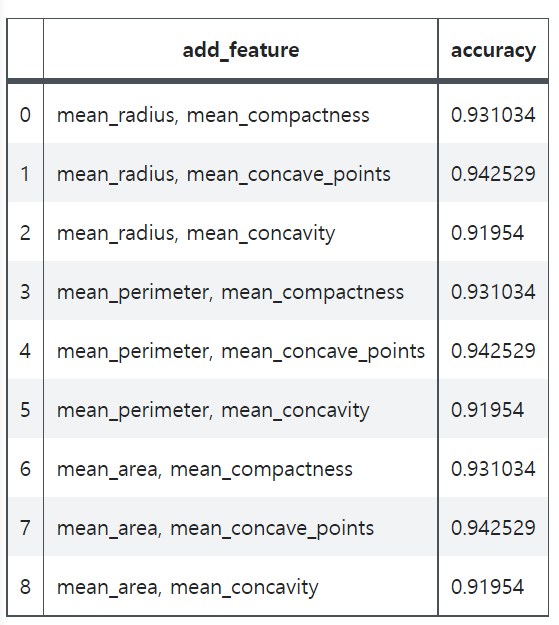

-> 위의 표는 mean_texture, mean_smoothness, mean_symmetry, mean_fractal_dimension는 고정한 채 mean_radius, mean_perimeter, mean_area 와 mean_compactness, mean_concave_points, mean_concavity 에서 각각 한 개씩 선택해서 만든 모델의 정확도를 정리한 것임. 총 사용한 feature의 수, 사용한 스케일러의 종류 등 다른 조건은 모두 동일하게 유지한 채 사용한 feature의 조합만 변경해서 모델을 생성하였는데, 정확도는 모두 달랐음. 이를 통해서 어떤 feature를 선택하는지가 모델의 성능에 영향을 미친다는 것을 알 수 있음.

In [ ]:
# Step 5) 최종 모델 만들기
# 마지막 작업으로는 만들었던 모델 중에서 가장 성능이 좋은 모델을 선택하여 최종 모델을 만드는 것임.
# 이때는 validation 데이터셋도 학습에 사용함. 
# 그리고 최종 모델의 성능은 test 데이터셋을 사용하여 평가함. 

In [11]:
# train 데이터셋과 validation 데이터셋 합치기
X_total = pd.concat([X_train, X_test])
y_total = pd.concat([y_train, y_test])

# feature/taraget 설정
feature = ["mean_texture", "mean_smoothness", "mean_symmetry", "mean_fractal_dimension", "mean_radius", "mean_concave_points"]
target = "label"

# 스케일러 생성
scaler = StandardScaler()

# 스케일 조정
X_total_sclaed = scaler.fit_transform(X_total)
X_test_scaled = scaler.transform(X_test)

# 모델 생성 및 학습 시키기
model = LogisticRegression()
model.fit(X_total_sclaed, y_total)

# 결과 확인
print("test 데이터셋 정확도")
model.score(X_test_scaled, y_test)

test 데이터셋 정확도


0.9651162790697675

모델의 정확도는 약 0.97임. 기준모델과 비교했을 때 이 모델은 학습이 잘 된 모델이며, 의미있는 모델임. 이 모델의 회귀계수는 아래와 같음.

In [12]:
model_coef = pd.Series(model.coef_[0], feature).sort_values(ascending=False)
model_coef

mean_fractal_dimension    0.404885
mean_symmetry            -0.412741
mean_smoothness          -0.676046
mean_texture             -1.359872
mean_radius              -2.334211
mean_concave_points      -2.580463
dtype: float64

회귀계수의 절댓값이 클수록 label의 결정에 큰 영향을 주는 것이며, 절댓값이 작을수록 label 결정에 영향을 작게 준 것임. 이 모델에서 종양이 양성인지 악성인지를 결정하는데 가장 큰 영향을 주는 feature는 mean_concave_points(오목한 점의 수의 평균)임. 그리고 가장 영향을 작게 주는 것은 mean_fractal_dimension(평균 프랙탈 차원)임.